In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import os
import zipfile

In [2]:
wine_data = pd.read_csv("winequality-red.csv")
wine_data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [3]:
wine_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [4]:
# Statistical values
wine_data.describe().T

,count,mean,std,min,25%,50%,75%,max
fixed acidity,1599.0,8.319637,1.741096,4.60000,7.1000,7.90000,9.200000,15.90000
volatile acidity,1599.0,0.527821,0.179060,0.12000,0.3900,0.52000,0.640000,1.58000
citric acid,1599.0,0.270976,0.194801,0.00000,0.0900,0.26000,0.420000,1.00000
residual sugar,1599.0,2.538806,1.409928,0.90000,1.9000,2.20000,2.600000,15.50000
chlorides,1599.0,0.087467,0.047065,0.01200,0.0700,0.07900,0.090000,0.61100
free sulfur dioxide,1599.0,15.874922,10.460157,1.00000,7.0000,14.00000,21.000000,72.00000
total sulfur dioxide,1599.0,46.467792,32.895324,6.00000,22.0000,38.00000,62.000000,289.00000
density,1599.0,0.996747,0.001887,0.99007,0.9956,0.99675,0.997835,1.00369
pH,1599.0,3.311113,0.154386,2.74000,3.2100,3.31000,3.400000,4.01000
sulphates,1599.0,0.658149,0.169507,0.33000,0.5500,0.62000,0.730000,2.00000


In [5]:
for col in wine_data.columns:
    print(col, 'has', wine_data[col].isna().sum(), 'missing values in data')

fixed acidity has 0 missing values in data
volatile acidity has 0 missing values in data
citric acid has 0 missing values in data
residual sugar has 0 missing values in data
chlorides has 0 missing values in data
free sulfur dioxide has 0 missing values in data
total sulfur dioxide has 0 missing values in data
density has 0 missing values in data
pH has 0 missing values in data
sulphates has 0 missing values in data
alcohol has 0 missing values in data
quality has 0 missing values in data


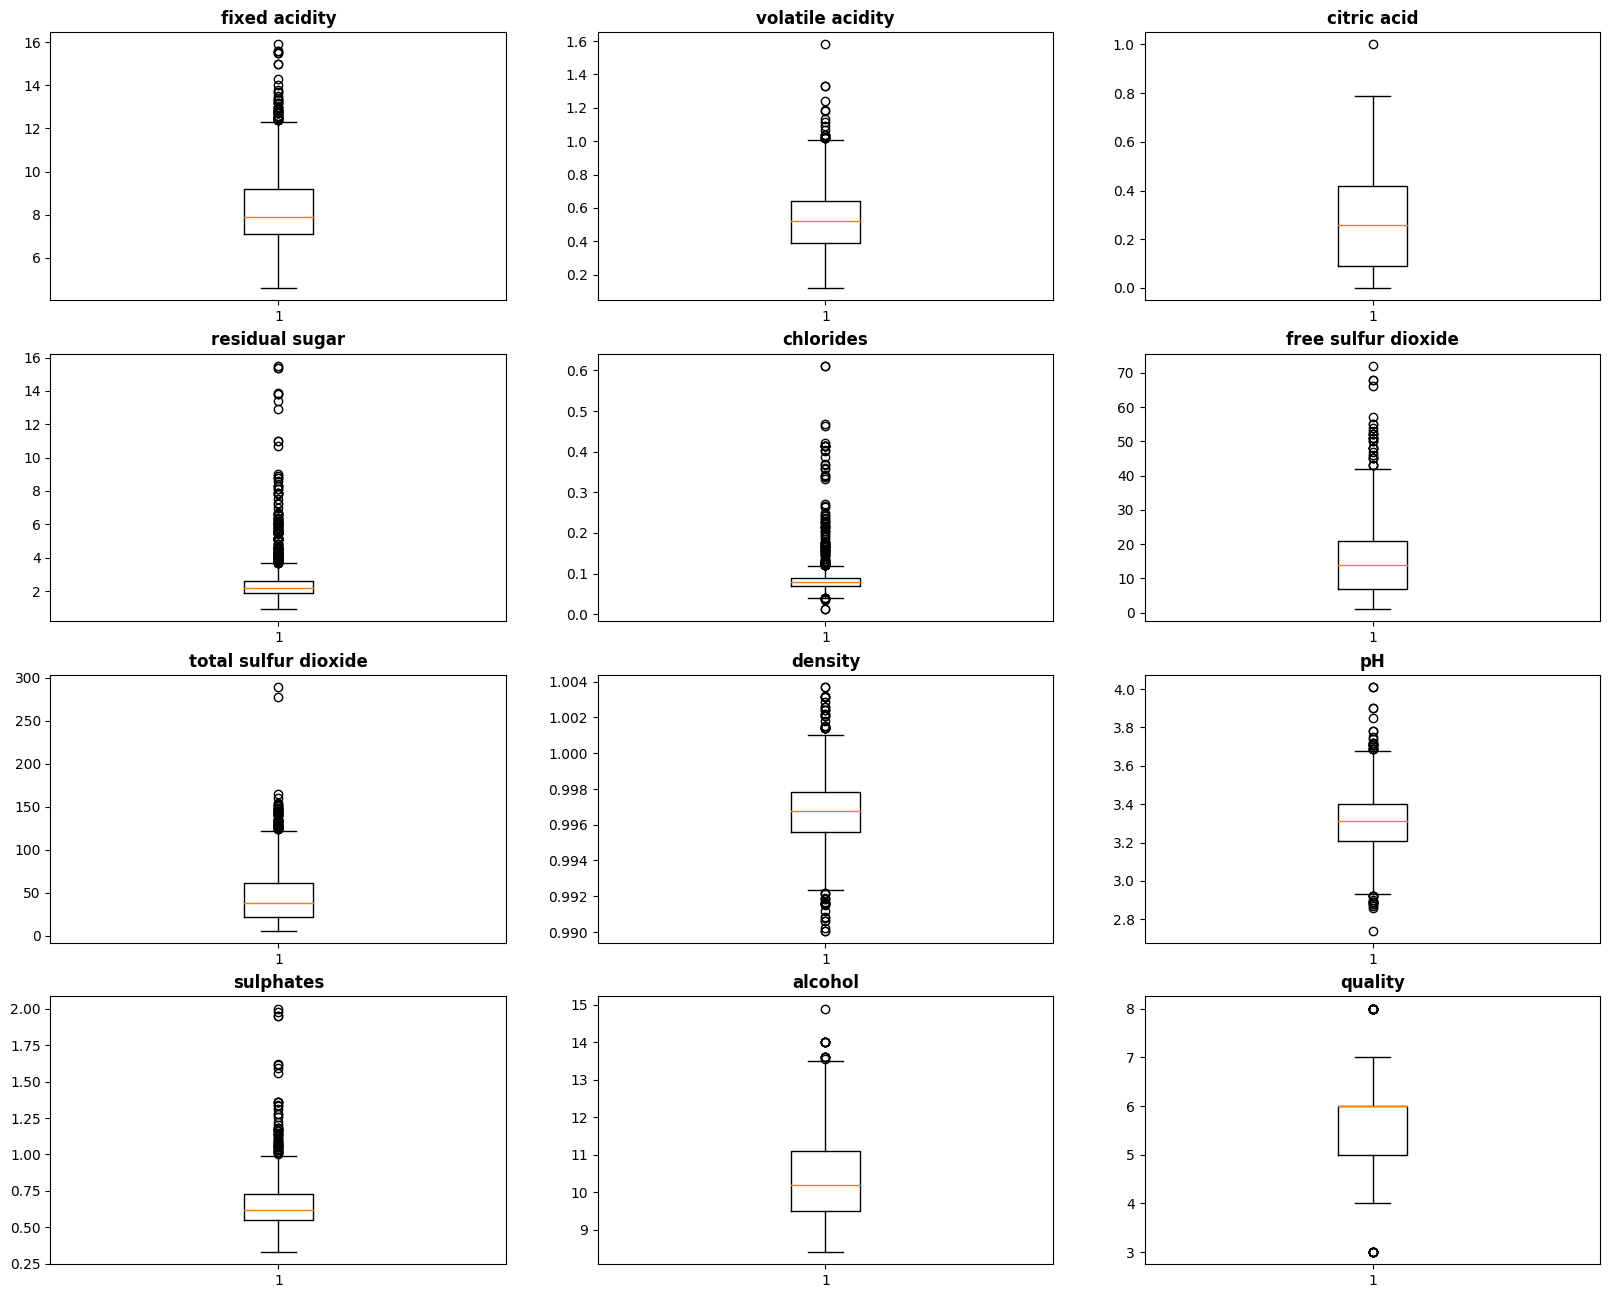

In [6]:
fig, axes = plt.subplots(4, 3, figsize=(20, 16))
axes = axes.ravel()
sub_plot = 0
for col in wine_data.columns:
    axes[sub_plot].boxplot(wine_data[col])
    axes[sub_plot].set_title(col, fontsize=12, fontweight='bold')
    sub_plot += 1

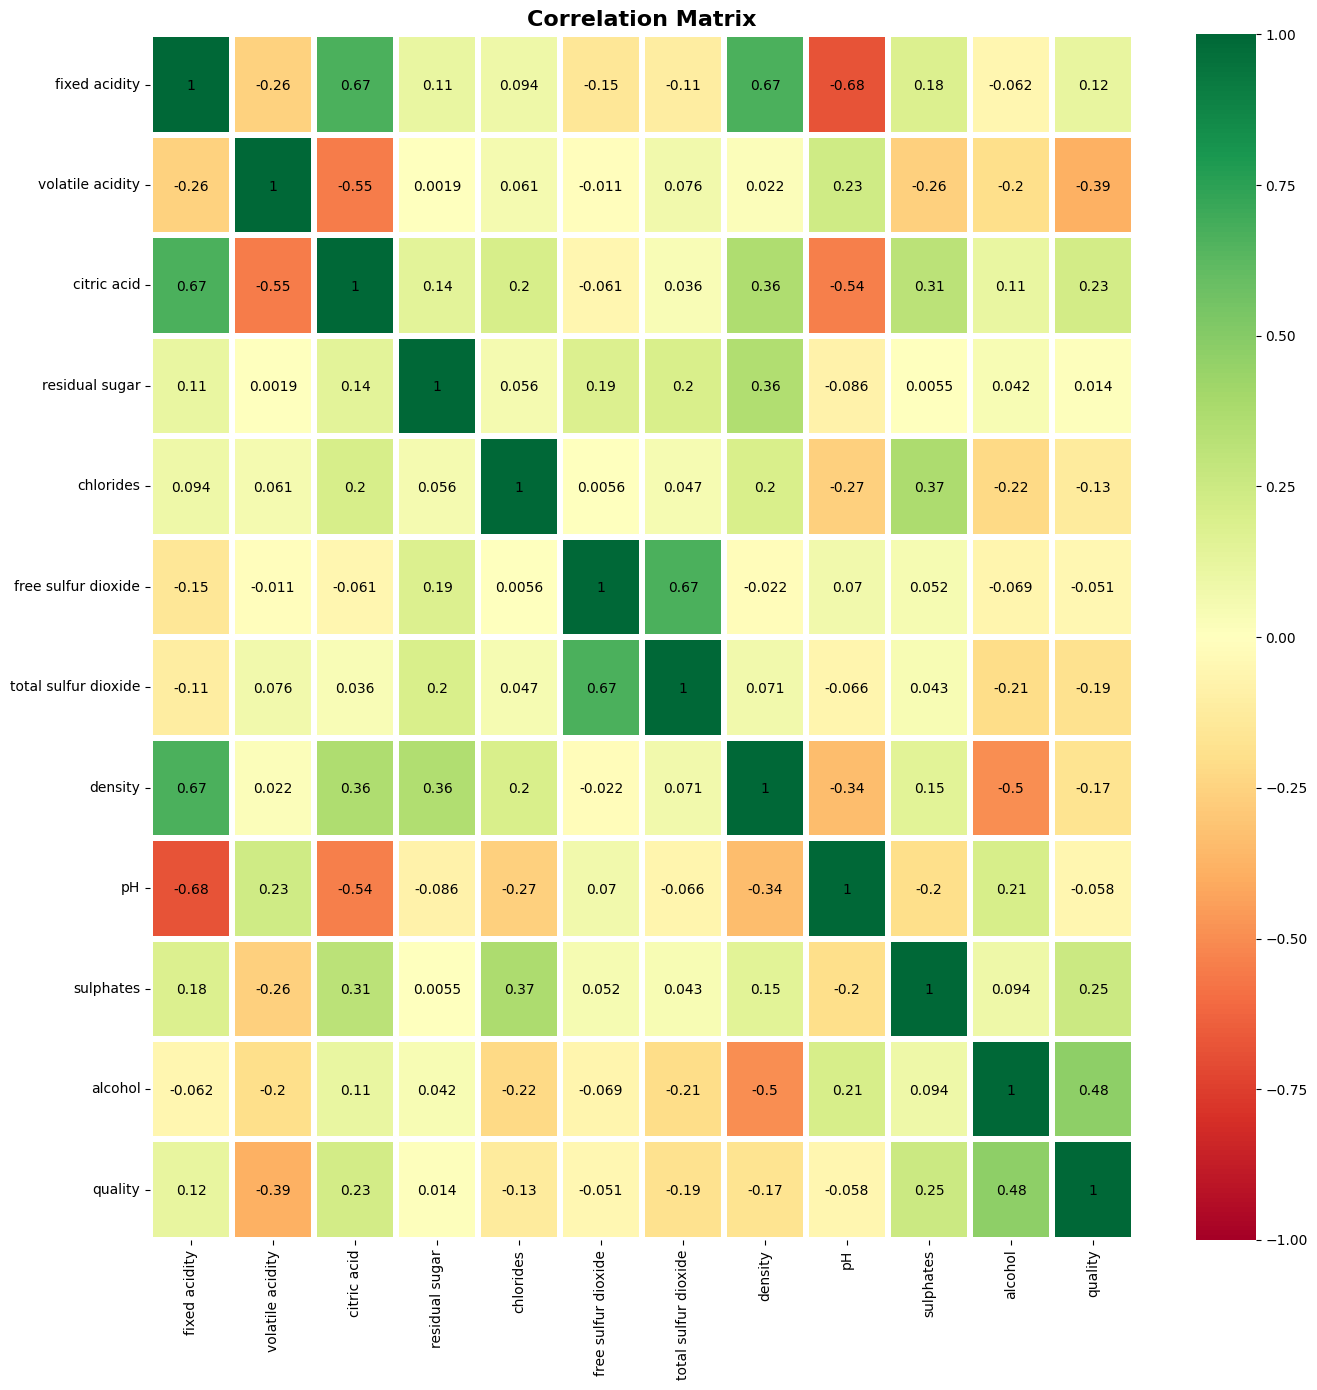

In [7]:
# Correlation Matrix
plt.rcParams["figure.figsize"] = [14, 14]
plt.rcParams["figure.autolayout"] = True

corr = wine_data.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(corr, cmap='RdYlGn', annot=True, annot_kws={"size": 10, "va": "center_baseline", "color": "black"}, linewidths=3, vmin=-1, vmax=1)
plt.title('Correlation Matrix', fontweight='bold', fontsize=16)
plt.show()

In [8]:
def sns_count_graph(df, parameter):
    plt.rcParams["figure.figsize"] = [4, 4]
    graph = sns.countplot(data=df, x=parameter, hue=parameter, palette='tab10', legend=False)
    graph.axes.set_title("Distribution of " + str(parameter), fontsize=11, fontweight='bold')
    graph.set_xlabel(str(parameter), fontsize=9, fontweight='bold')
    graph.set_ylabel("Sample Sizes", fontsize=9, fontweight='bold')
    graph.set_xticklabels(graph.get_xticklabels(), fontsize=8, rotation=45)
    plt.tight_layout()
    plt.show()

In [9]:
# orden ascendente(dataframe.columna a usar.valores unicos())
sorted(wine_data['quality'].unique())

[3, 4, 5, 6, 7, 8]

In [10]:
# We will define wine quality ranges
def quality_class(x):
    if x < 5:
        return 'poor_quality'
    elif x < 7:
        return 'regular_quality'
    else:
        return 'high_quality'
    
wine_data['quality_class'] = wine_data['quality'].apply(quality_class)

print('Quality Classes: ', sorted(wine_data['quality'].unique()))
print('New Quality Classes: ', sorted(wine_data['quality_class'].unique()))

Quality Classes:  [3, 4, 5, 6, 7, 8]
New Quality Classes:  ['high_quality', 'poor_quality', 'regular_quality']


C:\Users\robme\AppData\Local\Temp\ipykernel_12724\418922719.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  graph.set_xticklabels(graph.get_xticklabels(), fontsize=8, rotation=45)


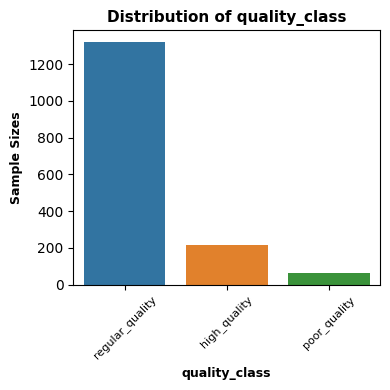

In [11]:
sns_count_graph(wine_data, 'quality_class')
plt.show()

In [12]:
wine_data.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,quality_class
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,regular_quality
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,regular_quality
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,regular_quality
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,regular_quality
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,regular_quality
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5,regular_quality
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5,regular_quality
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7,high_quality
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7,high_quality
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5,regular_quality


In [13]:
# Creating decision tree model
X = wine_data.iloc[:, :-2]

from sklearn.preprocessing import LabelEncoder

# It is necessary to convert labeled data into integer values
le = LabelEncoder()
y = le.fit_transform(wine_data['quality_class'])

In [14]:
# Dividing the dataset into training and testing sets.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

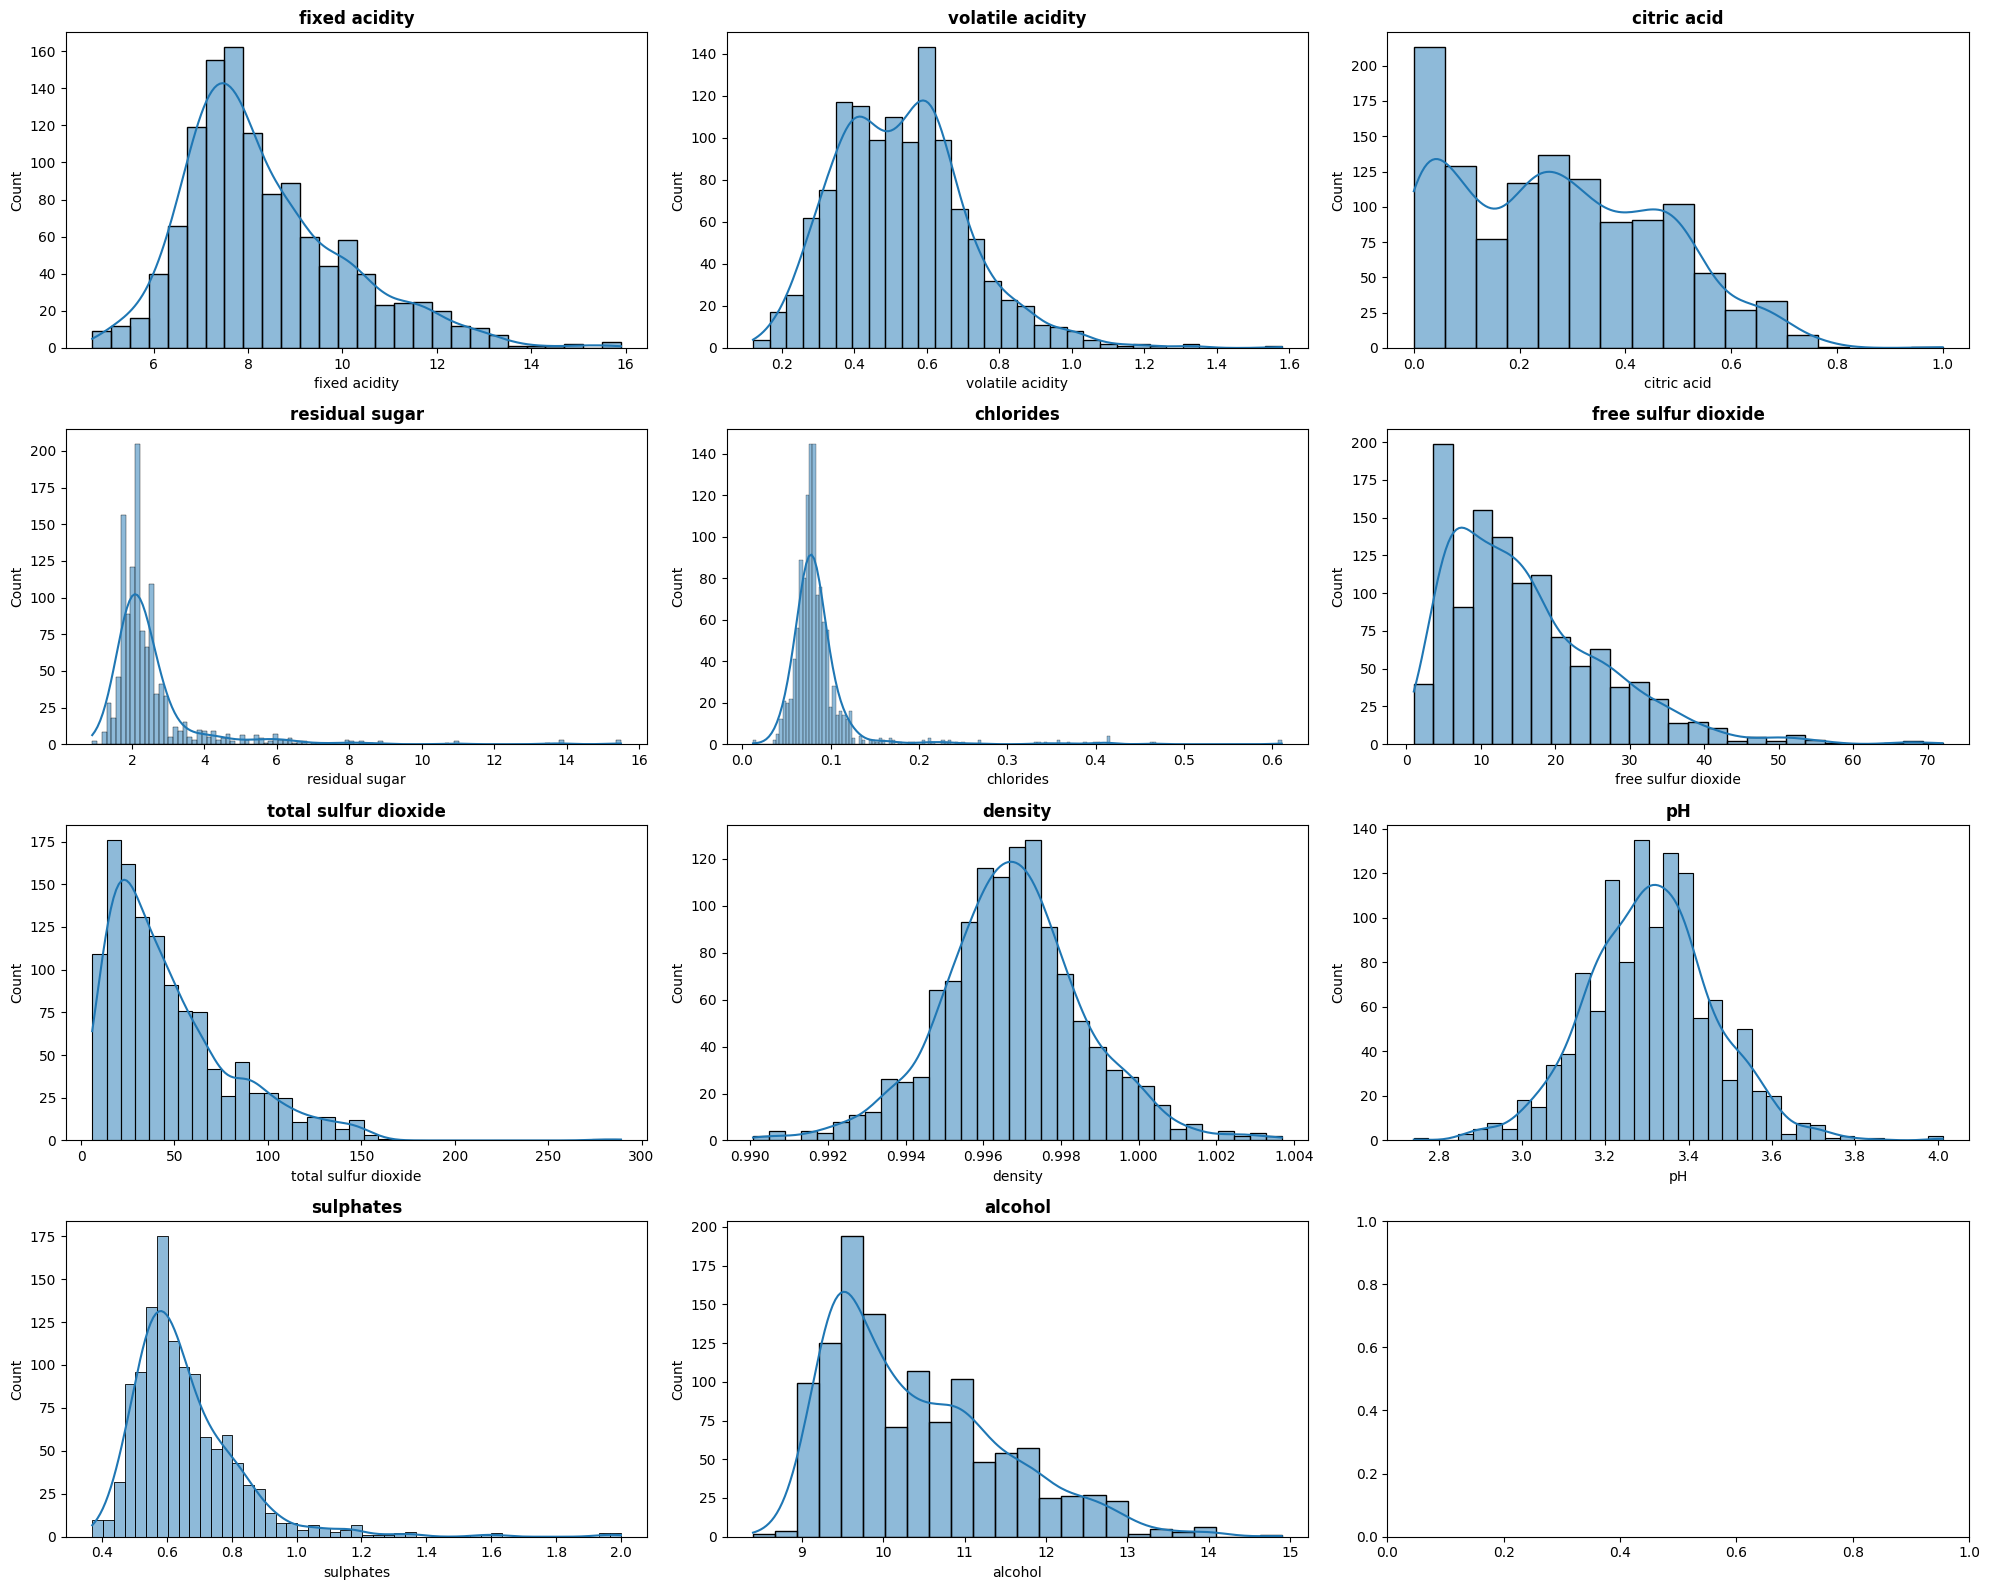

In [15]:
# X_train histogram
fig1, axes1 = plt.subplots(4, 3, figsize=(20, 16))
axes1 = axes1.ravel()
s_plot = 0
for col in X_train.columns:
    sns.histplot(X_train[col], ax=axes1[s_plot], kde=True)
    axes1[s_plot].set_title(col, fontsize=12, fontweight='bold')
    s_plot += 1

plt.tight_layout()
plt.show()

In [16]:
# Standard Scaler
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_1 = sc.fit_transform(X_train)
X_test_1 = sc.transform(X_test)

In [17]:
X_train.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
140,8.4,0.745,0.11,1.9,0.090,16.0,63.0,0.99650,3.19,0.82,9.6
1232,7.6,0.430,0.29,2.1,0.075,19.0,66.0,0.99718,3.40,0.64,9.5
720,8.4,0.560,0.04,2.0,0.082,10.0,22.0,0.99760,3.22,0.44,9.6
77,6.8,0.785,0.00,2.4,0.104,14.0,30.0,0.99660,3.52,0.55,10.7
39,7.3,0.450,0.36,5.9,0.074,12.0,87.0,0.99780,3.33,0.83,10.5


In [18]:
nom_cols = X_train.columns.tolist()
X_train_f = pd.DataFrame(data=X_train_1, columns=nom_cols)
X_train_f.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,0.035701,1.170139,-0.827972,-0.445352,0.057636,-0.012496,0.459864,-0.136917,-0.770684,0.911952,-0.756601
1,-0.425194,-0.547349,0.097514,-0.309962,-0.254119,0.270206,0.548141,0.224783,0.590788,-0.106087,-0.850481
2,0.035701,0.161456,-1.187883,-0.377657,-0.108633,-0.577901,-0.746586,0.448185,-0.576188,-1.237242,-0.756601
3,-0.886090,1.388233,-1.393547,-0.106878,0.348608,-0.200965,-0.511181,-0.083726,1.368771,-0.615107,0.276081
4,-0.598030,-0.438302,0.457426,2.262442,-0.274903,-0.389433,1.166079,0.554568,0.136964,0.968510,0.088321


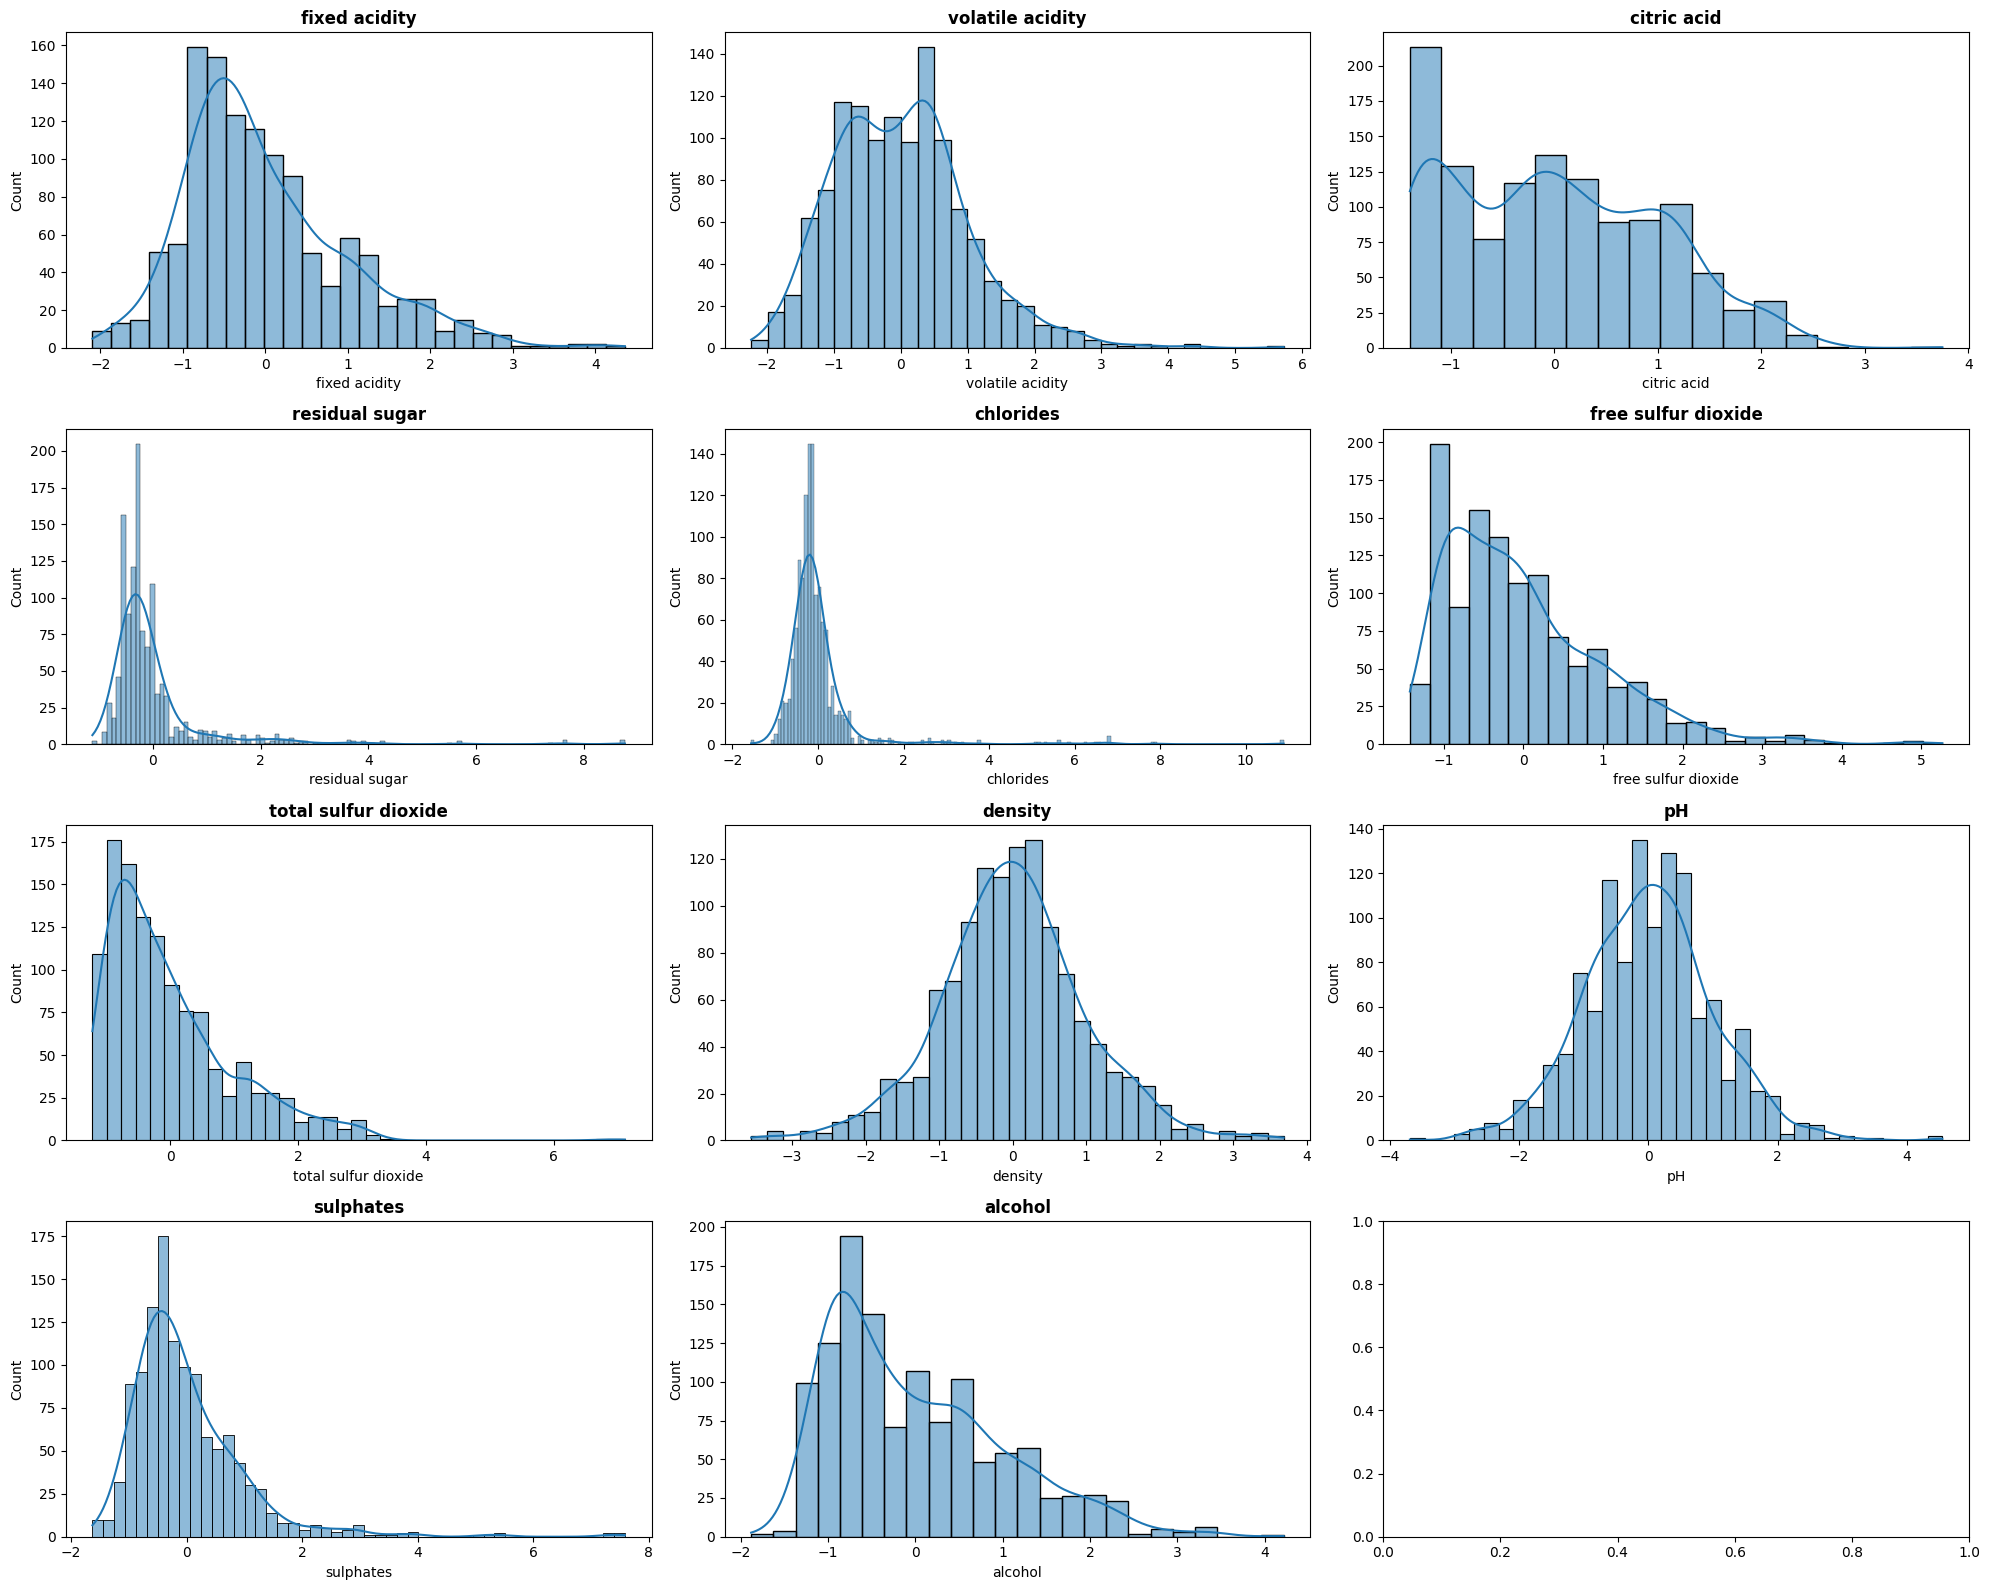

In [19]:
# X_train histogram
fig2, axes2 = plt.subplots(4, 3, figsize=(20, 16))
axes2 = axes2.ravel()
splot = 0
for col in X_train_f.columns:
    sns.histplot(X_train_f[col], ax=axes2[splot], kde=True)
    axes2[splot].set_title(col, fontsize=12, fontweight='bold')
    splot += 1

plt.tight_layout()
plt.show()

In [20]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion='entropy', random_state=0)
classifier.fit(X_train_1, y_train)
y_pred = classifier.predict(X_test_1)


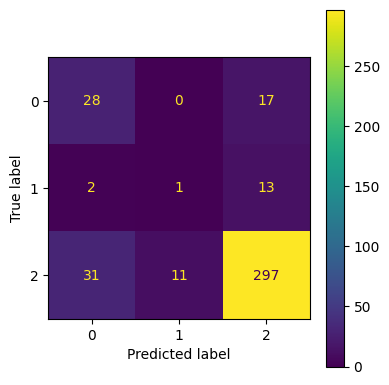

Accuracy:  0.815
F1-Score:  0.8181694834996723
Recall:  0.815


In [21]:
# Model Results
from sklearn.metrics import confusion_matrix, accuracy_score, ConfusionMatrixDisplay, recall_score, f1_score
cm = confusion_matrix(y_test, y_pred, labels=classifier.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classifier.classes_)
disp.plot()
plt.show()
print('Accuracy: ', accuracy_score(y_test, y_pred))
print('F1-Score: ', f1_score(y_test, y_pred, average='weighted'))
print('Recall: ', recall_score(y_test, y_pred, average='micro'))

In [22]:
from powerbiclient import QuickVisualize, get_dataset_config, Report
from powerbiclient.authentication import DeviceCodeLoginAuthentication

In [24]:
device_auth = DeviceCodeLoginAuthentication()

Performing device flow authentication. Please follow the instructions below.
To sign in, use a web browser to open the page https://microsoft.com/devicelogin and enter the code BBS7PUHPP to authenticate.

Device flow authentication successfully completed.
You are now logged in .

The result should be passed only to trusted code in your notebook.


In [25]:
PBI_visualize = QuickVisualize(get_dataset_config(X_train_f), auth=device_auth)

In [26]:
PBI_visualize

QuickVisualize()